In [1]:
import pandas as pd

data = pd.read_csv('/Users/ksushazinoveva/Downloads/merged.csv')
data

,Unnamed: 0,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,...,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,дата убытка,loss,month
0,0,2020-07,3383,1,1,1,1,211.000000,1,1,...,0.0,1,1,0.428571,1,1.000,1,2020-07-19,6.840,2020-07
1,1,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-31,2.090,2020-07
2,2,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-19,3.150,2020-07
3,3,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-17,9.200,2020-07
4,4,2020-07,3673,1,1,1,1,31.000000,1,1,...,0.0,1,1,0.000000,1,5.000,1,2020-07-15,2.720,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226374,226374,2022-02,203973,1,1,1,1,117.000000,1,1,...,52.0,1,1,0.000000,1,1.000,1,2022-02-17,1.700,2022-02
226375,226375,2022-02,203992,1,1,1,1,356.000000,1,1,...,46.0,1,1,0.000000,1,1.000,1,2022-02-25,0.702,2022-02
226376,226376,2022-02,203999,1,1,1,1,30.500000,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-24,6.050,2022-02
226377,226377,2022-02,203999,1,1,1,1,30.500000,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-25,1.650,2022-02


Убираем ненужные признаки, оставляем те, которые были выбраны в ходе исследования.

In [2]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
data.drop(columns = ['дата убытка', 'created_at_month'], inplace = True)

In [4]:
numeric_features = ['folk_4_code', 'comment_len', 'service_code', 'service_level_3_category_hash',
'service_level', 'doctor_len', 'diagnosis_len', 'diagnosis_clarification_len', 'standartized_diagnosis_len',
'diagnosis_uuid', 'diagnosis_category_level_3_hash', 'service_status', 'diagnosis_category_level_1_hash',
'service_quantity', 'cnt_visit']

categorical_features = ['status', 'month', 'patient_id']

features = numeric_features + categorical_features

data = data[numeric_features + categorical_features + ['loss']]

In [5]:
data

,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,status,month,patient_id,loss
0,1,211.000000,1,1,3.000,0,637,0,0.0,1,1,0.428571,1,1.000,1,created,2020-07,3383,6.840
1,1,72.166667,2,2,3.375,0,686,0,0.0,1,1,0.000000,1,3.125,2,created,2020-07,3533,2.090
2,1,72.166667,2,2,3.375,0,686,0,0.0,1,1,0.000000,1,3.125,2,created,2020-07,3533,3.150
3,1,72.166667,2,2,3.375,0,686,0,0.0,1,1,0.000000,1,3.125,2,created,2020-07,3533,9.200
4,1,31.000000,1,1,5.000,0,151,0,0.0,1,1,0.000000,1,5.000,1,delivered,2020-07,3673,2.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226374,1,117.000000,1,1,3.000,20,0,0,52.0,1,1,0.000000,1,1.000,1,delivered,2022-02,203973,1.700
226375,1,356.000000,1,1,3.000,48,0,0,46.0,1,1,0.000000,1,1.000,1,created,2022-02,203992,0.702
226376,1,30.500000,1,1,4.000,0,0,0,70.0,1,1,0.000000,1,1.000,2,created,2022-02,203999,6.050
226377,1,30.500000,1,1,4.000,0,0,0,70.0,1,1,0.000000,1,1.000,2,created,2022-02,203999,1.650


In [6]:
data.loc[data['loss'].isna()]

,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,status,month,patient_id,loss
101417,1,162.0,1,1,3.75,0,496,0,0.0,1,1,0.0,1,1.0,1,delivered,2021-04,96216,NaN
101425,1,162.0,1,1,3.75,0,496,0,0.0,1,1,0.0,1,1.0,1,delivered,2021-04,96216,NaN


In [7]:
data.drop(index = [101417, 101425], inplace = True)

/Users/ksushazinoveva/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train = X_train['loss']
y_test = X_test['loss']

Попробуем простейшую регрессионную модель (с регуляризацией), чтобы было с чем сравнить.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

features = numeric_features + categorical_features

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 


MAE =  2.751612076100423 
 MSE =  22.883250075931397 
 RMSE =  4.783644016430507


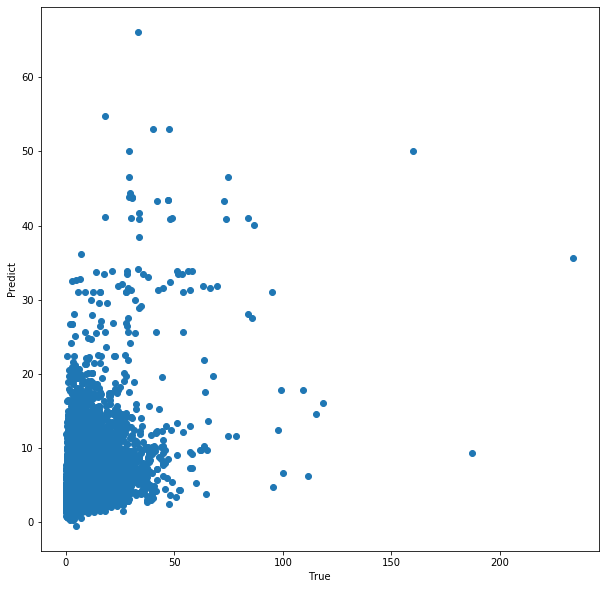

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, y_pred)
ax.set_xlabel('True')
ax.set_ylabel('Predict')
plt.show()

Теперь попробуем DecisionTree и Catboost почти без параметров (только ограничение на глубину, чтобы компьютерных мощностей хватило).

In [136]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', DecisionTreeRegressor(max_depth = 500))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False))

MAE =  2.938044109086513 
 MSE =  27.4731612185285 
 RMSE =  5.241484638776355


In [137]:
from catboost import CatBoostRegressor

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', CatBoostRegressor(iterations = 500, verbose = False))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False))

MAE =  2.96704971711158 
 MSE =  24.881920186147276 
 RMSE =  4.988178042747399


К удивлению, без подбора параметров результат сильно хуже, чем для Ridge регрессии.

Мы решили ориентироваться на MAE (тк она менее чувствительна к выбросам), она уменьшилась. Попробуем подбирать параметры: не на большой сетке, чтобы не ждать очень долго. Для catboost было выведено опытным путем (я не первый раз запускаю это ячейку), что количество итераций необходимо большое - его переберем вне сетки для ускорения процесса. Оптимальное - где-то 1500

In [148]:
#iterations = [100, 200, 500]
depth = [1, 7, 10]
learning_rate = [0.001, 0.01, 0.1]

res = {'iterations' : 0, 'learning_rate' : 0, 'depth' : 0}
best_score = 10000

for d in depth:
    for lr in learning_rate:
        pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', CatBoostRegressor(iterations = 100, learning_rate = lr, depth = d, silent = True))])
        model = pipeline.fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        score = mean_absolute_error(y_test, y_pred)
        if (best_score > score):
                    best_score = score
                        #res['iterations'] = i
                    res['learning_rate'] = lr
                    res['depth'] = d
                        
res, best_score                       

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

({'iterations': 0, 'learning_rate': 0.1, 'depth': 10}, 3.016227992720557)

In [149]:
depth = [10, 50, 100, 200, 500]
min_samples = [2, 5, 10]

res = {'depth' : 0, 'min_samples' : 0}
best_score = 10000

for d in depth:
    for ms in min_samples:
        pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),
                                       ('regression', DecisionTreeRegressor(max_depth = d,
                                                                           min_samples_split= ms))])
        model = pipeline.fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        score = mean_absolute_error(y_test, y_pred)
        if (best_score > score):
                    best_score = score
                    res['min_samples'] = ms
                    res['depth'] = d

res, best_score

({'depth': 200, 'min_samples': 10}, 2.9135122623701237)

Для Catboost лучший результат:

In [15]:
from catboost import CatBoostRegressor

pipeline = Pipeline(steps=[('ohe_and_scaling', column_transformer),('regression', CatBoostRegressor(iterations = 1000, learning_rate = 0.1, depth = 10, silent = True))])
model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MAE =  2.9382408919583507 
 MSE =  24.662975046319104 
 RMSE =  4.96618314667503


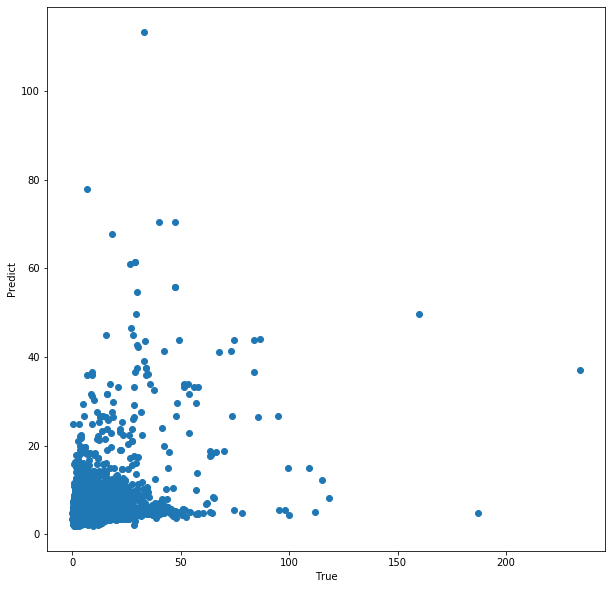

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, y_pred)
ax.set_xlabel('True')
ax.set_ylabel('Predict')
plt.show()

Для DecisionTree лучший результат:

In [12]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', DecisionTreeRegressor(max_depth = 200, min_samples_split = 10))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False))

MAE =  2.9134355008335384 
 MSE =  26.573647050366535 
 RMSE =  5.154963341321307


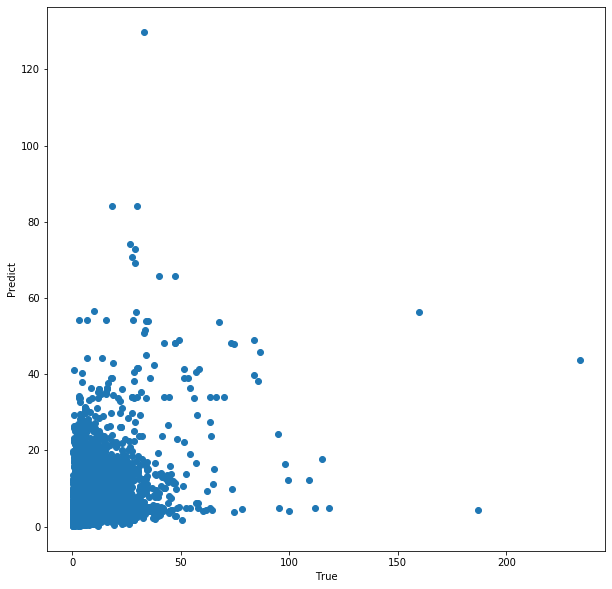

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, y_pred)
ax.set_xlabel('True')
ax.set_ylabel('Predict')
plt.show()

Лучшего результата, чем Ridge регрессия достичь не удалось. 